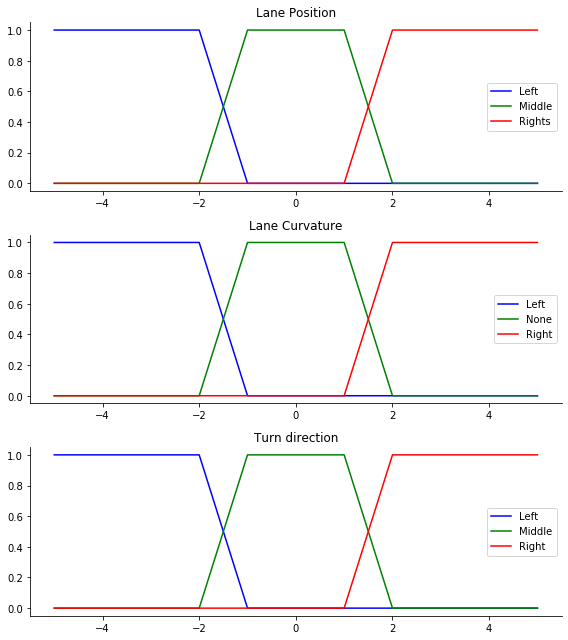

In [3]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

# Generate universe variables
#   * Quality and service on subjective ranges [0, 10]
#   * Tip has a range of [0, 25] in units of percentage points
x_pos = np.arange(-5, 6, 1)
x_curve = np.arange(-5, 6, 1)
x_turn  = np.arange(-5, 6, 1)

# Generate fuzzy membership functions
pos_left = fuzz.trapmf(x_pos, [-5,-5, -2, -1])
pos_md = fuzz.trapmf(x_pos, [-2,-1, 1, 2])
pos_right = fuzz.trapmf(x_pos, [1, 2, 5, 5])

curve_left = fuzz.trapmf(x_curve, [-5, -5, -2, -1])
curve_md = fuzz.trapmf(x_curve, [-2, -1, 1, 2])
curve_right = fuzz.trapmf(x_curve, [1, 2, 5, 5])

turn_left = fuzz.trapmf(x_turn, [-5, -5, -2, -1])
turn_md = fuzz.trapmf(x_turn, [-2, -1, 1, 2])
turn_right = fuzz.trapmf(x_turn, [1, 2, 5, 5])

# Visualize these universes and membership functions
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8, 9))

ax0.plot(x_pos, pos_left, 'b', linewidth=1.5, label='Left')
ax0.plot(x_pos, pos_md, 'g', linewidth=1.5, label='Middle')
ax0.plot(x_pos, pos_right, 'r', linewidth=1.5, label='Rights')
ax0.set_title('Lane Position')
ax0.legend()

ax1.plot(x_curve, curve_left, 'b', linewidth=1.5, label='Left')
ax1.plot(x_curve, curve_md, 'g', linewidth=1.5, label='None')
ax1.plot(x_curve, curve_right, 'r', linewidth=1.5, label='Right')
ax1.set_title('Lane Curvature')
ax1.legend()

ax2.plot(x_turn, turn_left, 'b', linewidth=1.5, label='Left')
ax2.plot(x_turn, turn_md, 'g', linewidth=1.5, label='Middle')
ax2.plot(x_turn, turn_right, 'r', linewidth=1.5, label='Right')
ax2.set_title('Turn direction')
ax2.legend()

# Turn off top/right axes
for ax in (ax0, ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()


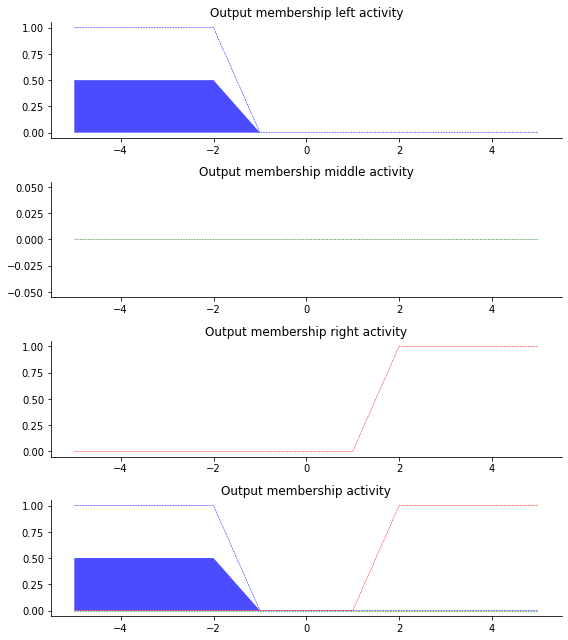

In [13]:
# We need the activation of our fuzzy membership functions at these values.
# The exact values 6.5 and 9.8 do not exist on our universes...
# This is what fuzz.interp_membership exists for!
position = 3
curvature = -1.5

pos_level_left = fuzz.interp_membership(x_pos, pos_left, position)
pos_level_md = fuzz.interp_membership(x_pos, pos_md, position)
pos_level_right = fuzz.interp_membership(x_pos, pos_right, position)

curve_level_left = fuzz.interp_membership(x_curve, curve_left, curvature)
curve_level_md = fuzz.interp_membership(x_curve, curve_md, curvature)
curve_level_right = fuzz.interp_membership(x_curve, curve_right, curvature)

# Now we take our rules and apply them. Rule 1 concerns pos left/mid/right AND curve.
# The AND operator means we take the min of these two.

active_rule1 = np.fmin(pos_level_md, curve_level_left) 
active_rule2 = np.fmin(pos_level_right, curve_level_left)
active_rule3 = np.fmin(pos_level_right, curve_level_md)

active_rule5 =np.fmax(active_rule3, np.fmax(active_rule1, active_rule2))


turn_activation_left = np.fmin(active_rule5,turn_left)

active_rule5= np.fmin(pos_level_left, curve_level_md)
active_rule6 = np.fmin(pos_level_left, curve_level_right)
active_rule7 = np.fmin(pos_level_md, curve_level_right)

active_rule8 =np.fmax(active_rule7,np.fmax(active_rule5,active_rule6))

turn_activation_right = np.fmin(active_rule8,turn_right)

active_rule9 = np.fmin(pos_level_left, curve_level_left)
active_rule10 = np.fmin(pos_level_md, curve_level_md)
active_rule11 = np.fmin(pos_level_right, curve_level_right)
active_rule12 = np.fmax(active_rule11, np.fmax(active_rule9, active_rule10))

turn_activation_md = np.fmin(active_rule12, turn_md)

turn0 = np.zeros_like(x_turn)

# Visualize this

fig, (ax0, ax1, ax2, ax3) = plt.subplots(nrows=4, figsize=(8, 9))

ax0.fill_between(x_turn, turn0, turn_activation_left, facecolor='b', alpha=0.7)
ax0.plot(x_turn, turn_left, 'b', linewidth=0.5, linestyle='--', )

ax1.fill_between(x_turn, turn0, turn_activation_md, facecolor='g', alpha=0.7)
ax1.plot(x_turn, turn0, 'g', linewidth=0.5, linestyle='--')

ax2.fill_between(x_turn, turn0, turn_activation_right, facecolor='r', alpha=0.7)
ax2.plot(x_turn, turn_right, 'r', linewidth=0.5, linestyle='--')

ax0.set_title('Output membership left activity')
ax1.set_title('Output membership middle activity')
ax2.set_title('Output membership right activity')

ax3.fill_between(x_turn, turn0, turn_activation_left, facecolor='b', alpha=0.7)
ax3.plot(x_turn, turn_left, 'b', linewidth=0.5, linestyle='--', )
ax3.fill_between(x_turn, turn0, turn_activation_md, facecolor='g', alpha=0.7)
ax3.plot(x_turn, turn0, 'g', linewidth=0.5, linestyle='--')
ax3.fill_between(x_turn, turn0, turn_activation_right, facecolor='r', alpha=0.7)
ax3.plot(x_turn, turn_right, 'r', linewidth=0.5, linestyle='--')
ax3.set_title('Output membership activity')

# Turn off top/right axes
for ax in (ax0, ax1, ax2, ax3):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

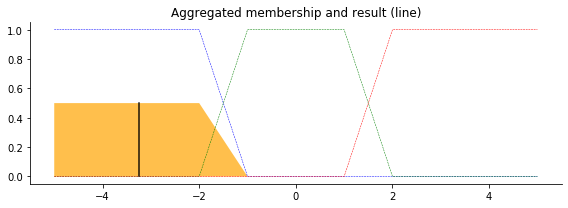

In [14]:
aggregated = np.fmax(turn_activation_left, np.fmax(turn_activation_md, turn_activation_right))

turn = fuzz.defuzz(x_turn, aggregated, 'centroid')
turn_activation = fuzz.interp_membership(x_turn, aggregated, turn)

fig, ax0 = plt.subplots(figsize=(8,3))

ax0.plot(x_turn, turn_left, 'b', linewidth=0.5, linestyle='--', )
ax0.plot(x_turn, turn_md, 'g', linewidth=0.5, linestyle='--')
ax0.plot(x_turn, turn_right, 'r', linewidth=0.5, linestyle='--')
ax0.fill_between(x_turn, turn0, aggregated, facecolor='Orange', alpha=0.7)
ax0.plot([turn, turn], [0, turn_activation], 'k', linewidth=1.5, alpha=0.9)
ax0.set_title('Aggregated membership and result (line)')

# Turn off top/right axes
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()